##### My project -yay66

In [23]:
# Importing the required libraries
# mainly used for visualizing part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# libraries & packages used for model selection and processing feature selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
from pandas_profiling import ProfileReport
from joblib import dump, load

# ignoring some warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Retrieving all column & all rules: Not restrict in display dataframe & make sure we can see all columns

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import dataset

In [8]:
data = pd.read_csv("diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Base info from dataset

In [9]:
# checking the dataframe size to learn what amount of data are dealing with (data point, features)
data.shape

(768, 9)

In [10]:
# checking the datatypes for all features/columns & whether have empty cell or not
data.info() 
data.isnull().sum()
# 7 features are int, 2 features are float, 9 features are numerical fields; non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# read the data error describe to check the spread of values across all numerical fields
data.describe()
# here, describe function basically no check the spread of values across all the numercial fields, so get the count, mean, standard deviation, etc of each of features

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Diabetic outcomes - %

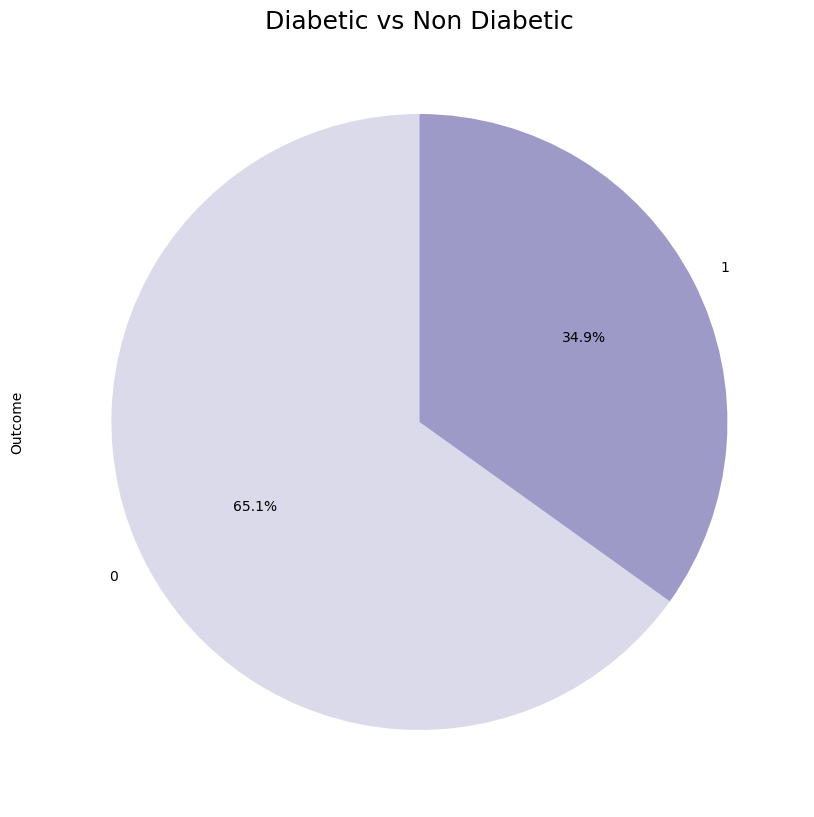

In [12]:
# Pie plot of the percentage of Diabetic and Non Diabetic in this dataset
# 1 for Diabetic, 0 for Non Diabetic
pie_colors = sns.color_palette("Purples",3)

plt.subplots(figsize=(10,10))
data['Outcome'].value_counts().plot.pie(colors=pie_colors, autopct='%1.1f%%', startangle = 90)
plt.title('Diabetic vs Non Diabetic', fontsize=18)
plt.show()
# there are total 34.9% have Diabetic in this dataset

# Data cleaning & Imputation

### Checking missing value - 0: Finding out all columnists which are having 0 in any one of their rows

In any dataset, there are usually some missing data. Missing data present various problems. Not only reduces statistical power and might cause bias in the estimation of parameter, also reduce the representativeness of the samples. 
During the EDA for this dataset, we only have 768 smaples and we cannot go ahead to delete the huge amount of data for missing values. I choice the most conservative option to model the missing data in order to develop an unbiased estimate open_in_new and hope to conserve as much as possible because any data removal can affect my statistical power.
Therefore, I use two methods to dealing the missing value.
1. I recoded missing values with labels of NaN to make them consistent throughout my dataset. These actions help to retain data from as many research subject as possible with few or no changes.
2. Impute the missing values known, like use the median values.

In [13]:
# checking if any one data equal to critical zero & print columns' name
data.loc[:, (data == 0). any(axis=0)].columns
# Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Outcome'],dtype='object')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')

Zero value analysis across the columns
basic understanding and try to make sense from the business point of view
- Pregnancy can be 0
- Outcome is target variable with value 0 or 1
- All other columns value with 0 means data is not available hence needs to be replaced with NaN. ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' cannot be zero in real world.)

In [14]:
# Will cleaning the following features only - build a list
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
# Replacing 0 value with null values in in values with NaN - 
# Doing by using data calls to call Triple Zero with NPR or any and all right
data[cols] = data[cols].replace(0,np.NaN)

In [15]:
# Checking... 0 value
data.loc[:, (data == 0). any(axis=0)].columns

Index(['Pregnancies', 'Outcome'], dtype='object')

### Checking missing value - the percentage of missing/null value across all the columns **

In [16]:
# Checking the percentage of missing values across all the columns
round(100*(data[data.columns].isnull().sum()/len(data.index)),2)
# Get the sum of the null data and divide by the total number of rows, rounding off multiplying the 100 and turning off the two decimal places)
# Getting the highest missing values for skin thickness and insulin. impute in this case is by median values.

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

In [17]:
# checking median value of Glucose across different outcomes
# agg(): aggregating by median
print(data.groupby('Outcome')['Glucose'].agg(['median']))
# for the Glucose, all null values which I know of all the values which are having outcome at zero.

         median
Outcome        
0         107.0
1         140.0


In [18]:
# defind Fun: use for_loops in the list to impute the median values across columns grouped by outcome.
# Replacing for each of features for whatever values are null & replacing with its median provided is grouped by the outcome.
def impute_median(df, cols):
    for col in cols:
        df[col]=df.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))

In [19]:
# Calling the fun to imputethe median values
impute_median(data, cols)

In [20]:
# Checking... Percentage of missing values
round(100*(data[data.columns].isnull().sum()/len(data.index)),2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# EDA

#### Pandas Profiling Report

In [22]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# Save report as html format
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("Pandas Profiling Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

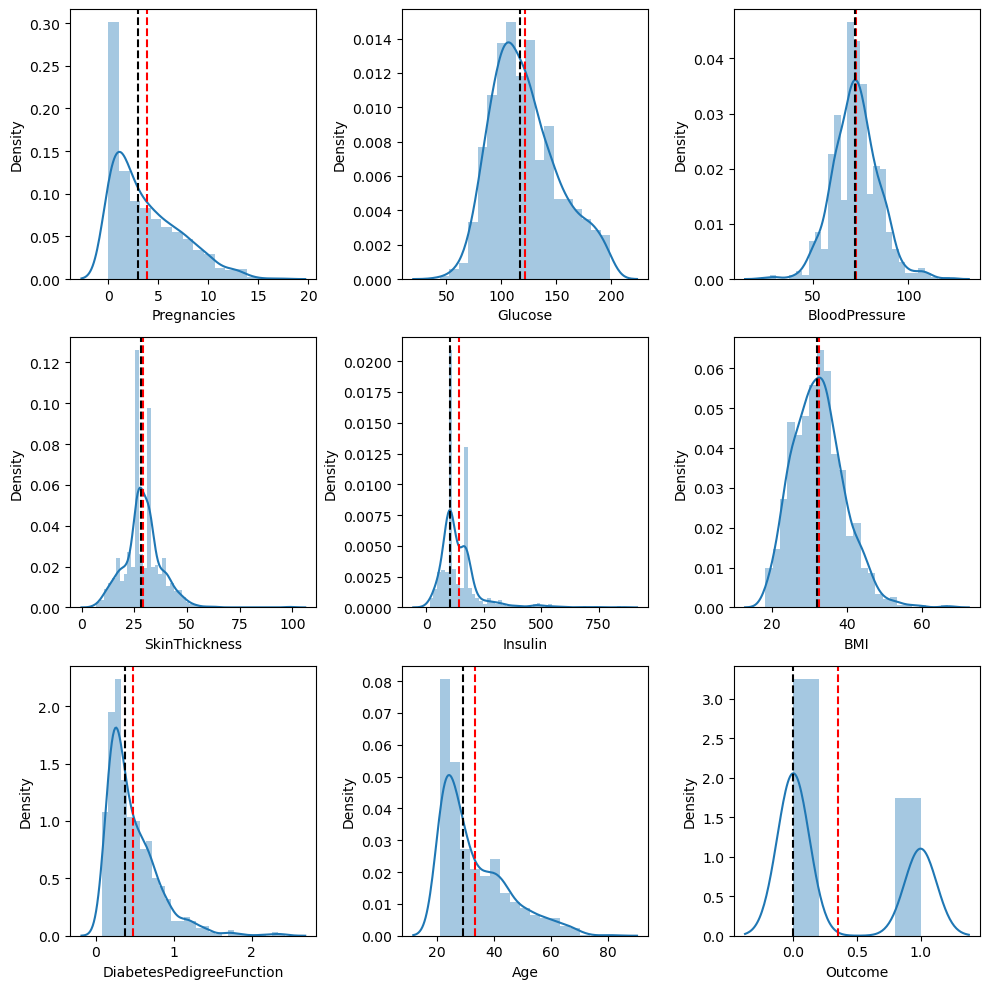

In [234]:
def make_distplot(data, col, ax):
    sns.distplot(data[col], ax = ax)
    ax.axvline(data[col].mean(), linestyle = '--', color = "red")
    ax.axvline(data[col].median(), linestyle = '--', color = "black")

numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

fig, ax = plt.subplots(3,3, figsize = (10,10))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(data, numeric_columns[i], ax[i])

plt.tight_layout()

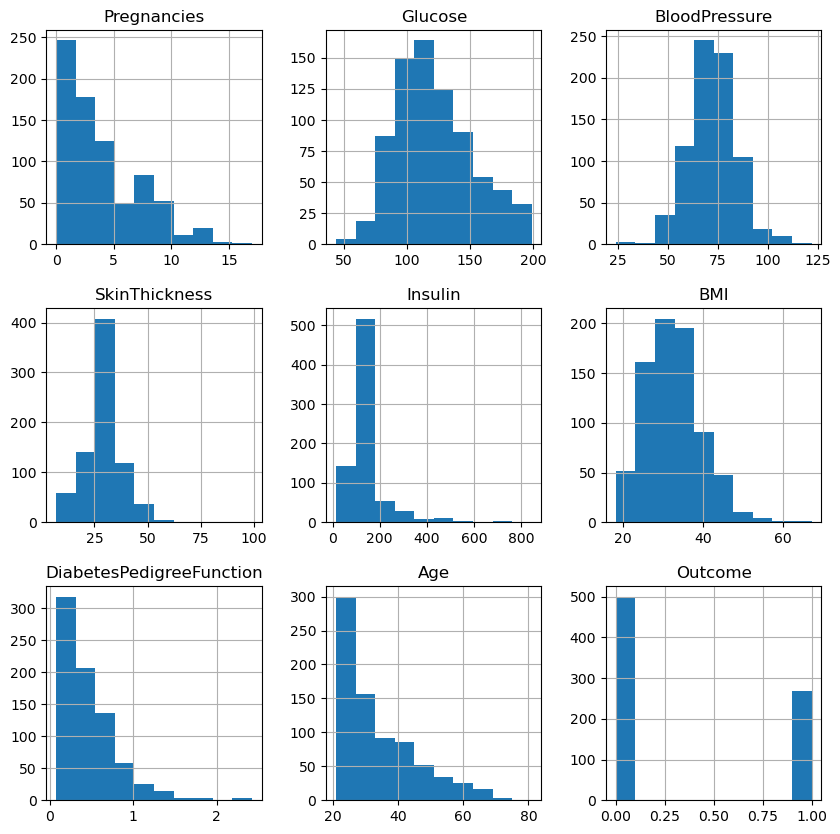

In [235]:
data.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

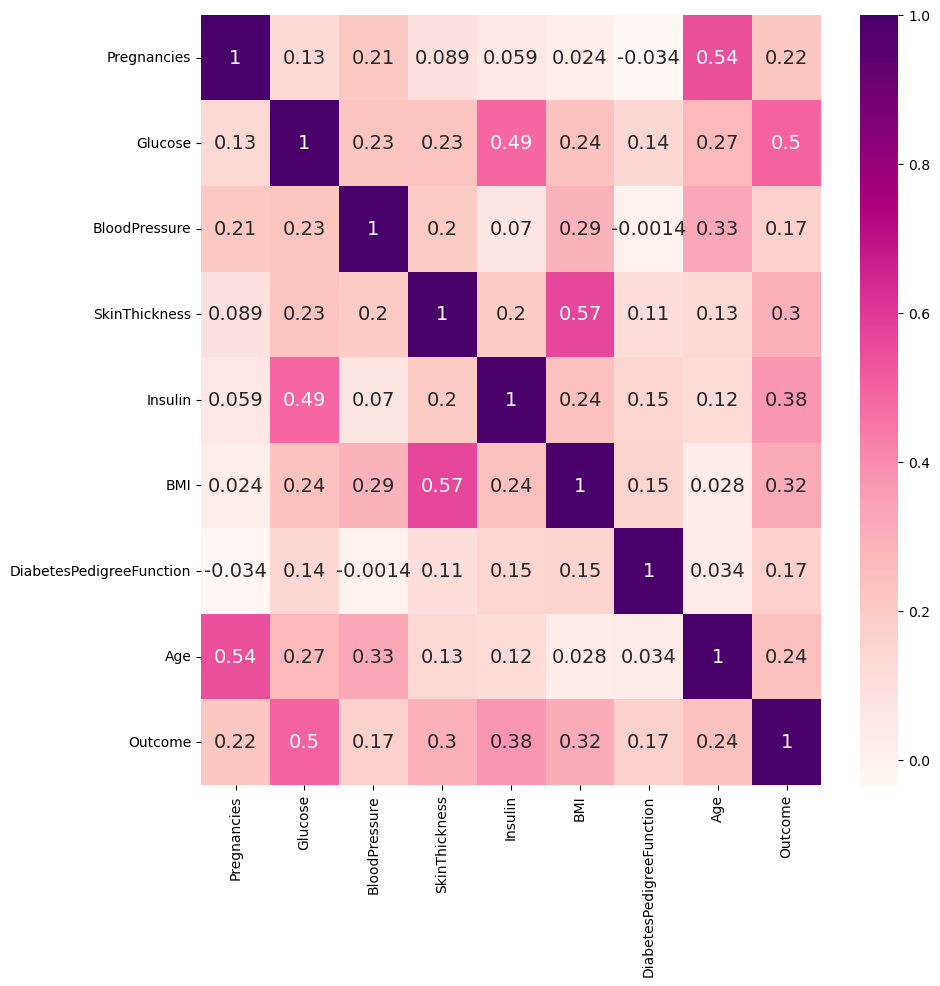

In [236]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdPu", annot_kws={"size":14})

Now, dataset are ready to use. I will select all attributes into the model. 

# Data Preparation

#### Split Data- x(independent feature) & y(dependent feature)

In [41]:
X = data
y = data.pop('Outcome')
# all features come invite to X, but no outcome

#### Train and test

In [42]:
# defining transactions/training is 70%, setting random state as 42, stratify Y(target var) stratified by signifies==>equal distribution of both zeros and ones.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y)

In [43]:
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
209            7    184.0           84.0           33.0    169.5  35.5   
176            6     85.0           78.0           27.0    102.5  31.2   
147            2    106.0           64.0           35.0    119.0  30.5   
454            2    100.0           54.0           28.0    105.0  37.8   
636            5    104.0           74.0           27.0    102.5  28.8   

     DiabetesPedigreeFunction  Age  
209                     0.355   41  
176                     0.382   42  
147                     1.400   34  
454                     0.498   24  
636                     0.153   48

#### Performed preprocessing step before ML
I want each feature to have zero-mean, unit standard-deviation, more normally distributed data, and are okay with transforming my data. I use the function of standard scaler from sklearn library to standardize the range of functionality of the input dataset.

In [44]:
# Fitting the standard scaler on train set and then transforming across all the sets of X
scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Saving the scaler object into a file
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

# Models

### Choose a model & its performance
Find a good model -- evolution on the model -- finally predict on the model

In [46]:
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LinearSVM',SVC(kernel='linear')))
models.append(('NonLinearSVM',SVC(kernel='rbf')))
models.append(('MNB',MultinomialNB()))
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# Naive Bayes，Neural Network
# LR, KNN, NB, DT, RF, SVM

models

[('RF', RandomForestClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('LinearSVM', SVC(kernel='linear')),
 ('NonLinearSVM', SVC()),
 ('MNB', MultinomialNB()),
 ('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB())]

#### Folds: split up dataset into 10 sets and going to do it across 10 folds to get an average out of it, which will be inserted into the 'entries' list. 
A k value of 10 provides a good balance between computational cost and the quality of the evaluation. It provides a large enough validation set to get an accurate evaluation of the model's performance, while also ensuring that most of the data is used for training the model.

In [47]:
folds = 10
kfold=KFold(n_splits=folds,random_state=45,shuffle=True)
cv_df = pd.DataFrame(index=range(folds * len(models)))

#### Checking the model performance across range of models defined here - set function & execute
The models will be scoring on accuracy in the following set function and print by plot which will help in better visualization

In [48]:
entries = []

for model_name,model in models:
  # model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

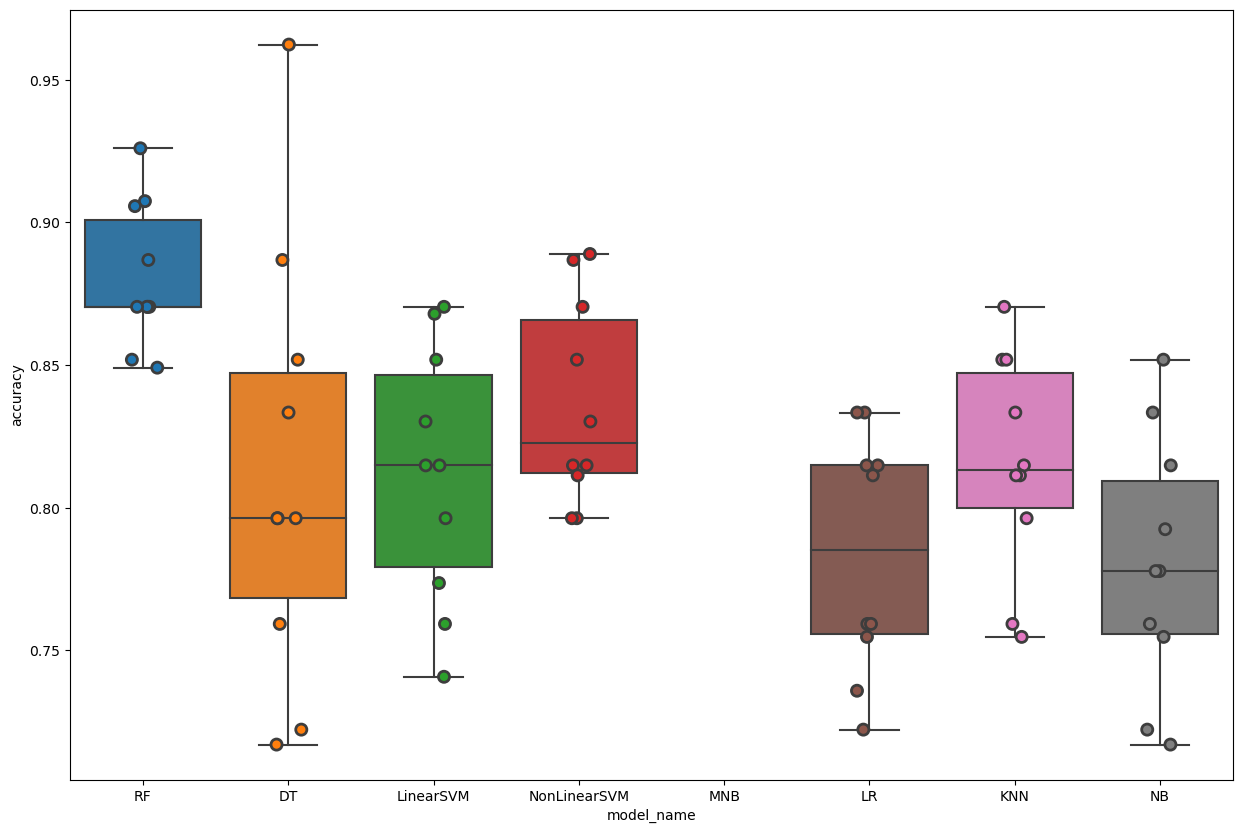

model_name
RF              0.880818
NonLinearSVM    0.836164
KNN             0.815514
DT              0.812159
LinearSVM       0.811985
LR              0.783892
NB              0.780119
MNB                  NaN
Name: accuracy, dtype: float64

In [49]:
# Plotting as box plot & Printing the model accuracy --> understanding clearly which model is performing better
plt.figure(figsize=[15,10])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

##### The Random Forest is performing better than other models because its average value is very high compared to other models. I considered RF as an optimal algorithm in this case.

# Best Model - Random Forest model & Model Evaluation

- Run model with default parameters 
- Acc on train set
- Acc on test set
- Check AUC-ROC
- Test Acc & Confusion Martrix

### Fitting the model on train set

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

### Classification Report

#### Making predictions on train set & printing the classification report

In [51]:
y_train_pred = rfc.predict(X_train)
print("----------Train Set - classification report ----------\n")
print(classification_report(y_train,y_train_pred))

----------Train Set - classification report ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



#### Makring predictions on test set & printing the classification report

In [52]:
y_test_pred = rfc.predict(X_test)
print("----------Test Set - classification report ----------\n")
print(classification_report(y_test,y_test_pred))

----------Test Set - classification report ----------

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       150
           1       0.85      0.78      0.81        81

    accuracy                           0.87       231
   macro avg       0.87      0.85      0.86       231
weighted avg       0.87      0.87      0.87       231



Big red flag: Overfitting occurs! The model doesn't generalize well from the training data to unseen data.
Solution: K-fold Cross-validation - tuning hyperparameters

### AUC-ROC 

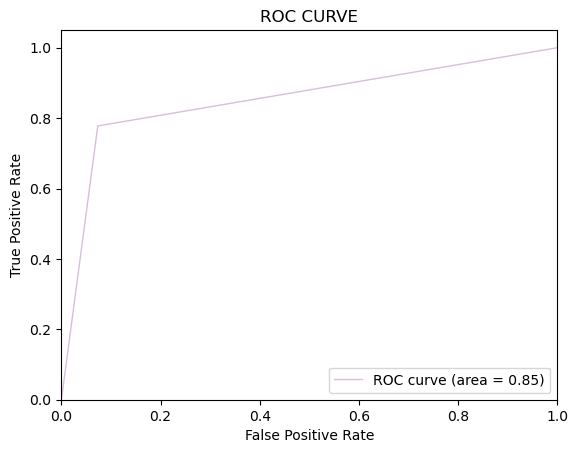

RF roc_value: 0.8522222222222221


In [53]:
plt.title ("ROC Curve")
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# plt.figure()
plt.plot(fpr, tpr, color='thistle', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()
# printing the values
XGB_roc_value = roc_auc_score(y_test, y_test_pred)
print("RF roc_value: {0}" .format(XGB_roc_value))

##### HIgh AUC value == Better prediction power of the model == Better perfomance of Model at distinguishing between positive and negative classes.

### Test Accuracy & Confusion Matrix

In [54]:
print("Test Accuracy is : ",round(accuracy_score(y_test,y_test_pred),2)*100)
print(confusion_matrix(y_test,y_test_pred))
# TP | FP
# FN | TN

Test Accuracy is :  87.0
[[139  11]
 [ 18  63]]


## Deep Learning with parameter & Improve performance

### Checking the default parameter

In [55]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter Tuning
#### Finding the optimal hyperparameter values for a given dataset and trying to improve the performance of the Model, like get the best accuracy or lowest lost. Because a critical part of making the most out of a model a model is hyperparameter tuning. My ultimate goal is to have a robust, accurate, and not-overfit model.

check all the things and returns back what is a best parameter it has achieved for perfectly great accuracy. I am going with the randomized the SeachCV(save computation time) to do hyperparameter tuning on validation data.

In [118]:
# Creating the hyper-parameter grid for the model and using Randomized SearchCV(cross-validation) to do hyper-parameter tuning on validation data

folds = KFold(n_splits = 10, shuffle=True, random_state=42)

param_grid = {
    'criterion': ["entropy", "gini"],
    'max_depth': range(0,10,1),
    'min_samples_leaf': range(0,10,1),
    'min_samples_split': range(0,10,1),
    'n_estimators': [40,50,60,70,80,100,200,300], 
    'max_features': ["auto", "sqrt", "log2"]
}

In [119]:
# Creating a based model
rf = RandomForestClassifier(bootstrap=True)

In [120]:
# Instantiate the grid search model
rf_grid_search = RandomizedSearchCV(estimator = rf,
                                   param_distributions = param_grid,
                                   scoring = 'accuracy',
                                   cv = folds,
                                   n_jobs = -1,
                                   verbose = 1,
                                   n_iter = 500,
                                   random_state = 42)
rf_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(0, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(0, 10),
                                        'min_samples_split': range(0, 10),
                                        'n_estimators': [40, 50, 60, 70, 80,
                                                         100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [121]:
# Try this line with multiple times
# Printing/Finding the best score that we can get using the the parameters
# Each time the line is executed post executing the above RandomizedSearchCV it will give different parameters because of very nature RandomizedSearchCV
print('I can get score of :',rf_grid_search.best_score_,' using',rf_grid_search.best_params_)

I can get score of : 0.8882948986722573  using {'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini'}


In [153]:
# Building the model with the best hyperparameters obtained above (recorded)
rfc_h = RandomForestClassifier(bootstrap=True,
                               criterion= 'entropy',
                               max_features='log2',
                               max_depth= 9,
                               min_samples_leaf= 1,
                               min_samples_split= 7,
                               n_estimators= 40,
                               random_state= 42)

In [154]:
# Fitting the model on train set
rfc_h.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_split=7, n_estimators=40, random_state=42)

# Prediction & Model evaluation

### Train set

In [155]:
# Making predictions on train set
y_train_pred = rfc_h.predict(X_train)

In [156]:
# Classification Report
print("----------Train Set (After)- classification report ----------\n")
print(classification_report(y_train,y_train_pred))

----------Train Set (After)- classification report ----------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       350
           1       0.98      0.95      0.97       187

    accuracy                           0.98       537
   macro avg       0.98      0.97      0.98       537
weighted avg       0.98      0.98      0.98       537



### Test set

In [157]:
# Predicting on test set
y_test_pred = rfc_h.predict(X_test)

In [158]:
# Classification Report
print("----------Test Set (After)- classification report ----------\n")
print(classification_report(y_test, y_test_pred))

----------Test Set (After)- classification report ----------

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       150
           1       0.84      0.79      0.82        81

    accuracy                           0.87       231
   macro avg       0.87      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



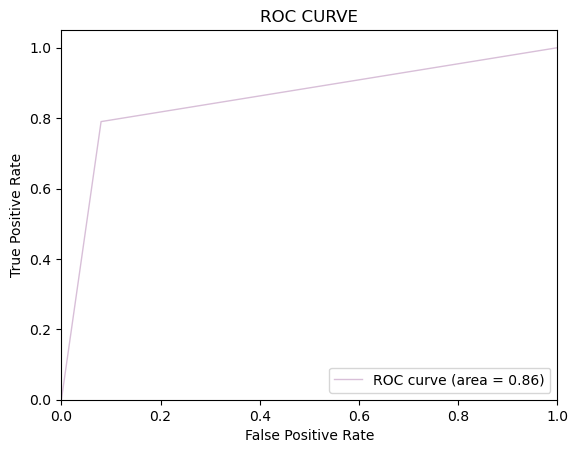

RF roc_value: 0.8550617283950618


In [159]:
# Plot - AUC - ROC
plt.title ("ROC Curve")
#Area under Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# plt.figure()
plt.plot(fpr, tpr, color='thistle', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Print roc value -
RF_roc_value = roc_auc_score(y_test, y_test_pred)
print("RF roc_value: {0}" .format(RF_roc_value))

##### AUC - ROC value also get improved from 0.846 to  0.864

### Evaluation: Confusion Matrix

In [160]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)

### Evaluation: Test Accuracy

In [161]:
test_accuracy = round(metrics.accuracy_score(y_test, y_test_pred),2)*100
print("Test Accuracy is : ",test_accuracy, "\n")
print(confusion)

Test Accuracy is :  87.0 

[[138  12]
 [ 17  64]]


# Top 2 - SVC (kernel = 'rbf')

In [203]:
svc = SVC(kernel='rbf')

In [204]:
svc.fit(X_train,y_train)

SVC()

In [205]:
y_train_pred = svc.predict(X_train)

In [206]:
print("----------Train Set - classification report ----------\n")
print(classification_report(y_train,y_train_pred))

----------Train Set - classification report ----------

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       350
           1       0.88      0.82      0.85       187

    accuracy                           0.90       537
   macro avg       0.89      0.88      0.89       537
weighted avg       0.90      0.90      0.90       537



In [207]:
y_test_pred = svc.predict(X_test)

In [208]:
print("----------Test Set - classification report ----------\n")
print(classification_report(y_test,y_test_pred))

----------Test Set - classification report ----------

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       150
           1       0.75      0.70      0.73        81

    accuracy                           0.81       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



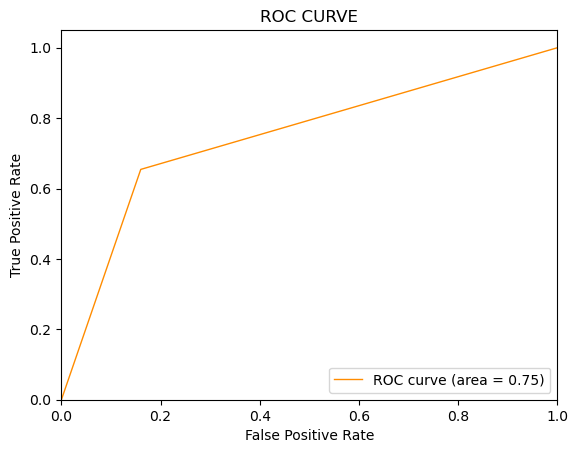

In [189]:
plt.title ("ROC Curve")
#Area under Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
# plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [190]:
svcb_roc_value = roc_auc_score(y_test, y_test_pred)
print("svc roc_value: {0}" .format(svcb_roc_value))

svc roc_value: 0.7471604938271604


In [191]:
print("SVC - Test Accuracy is : ",round(accuracy_score(y_test,y_test_pred),2)*100)
print(confusion_matrix(y_test,y_test_pred))

SVC - Test Accuracy is :  77.0
[[126  24]
 [ 28  53]]


In [192]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### SVC Hyperparameter Tuning

In [80]:
# checking K
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.813780260707635
poly
0.8119180633147114
rbf
0.8975791433891993
sigmoid
0.7486033519553073


In [81]:
## RBF is best one

In [82]:
folds = KFold(n_splits = 10, shuffle=True, random_state=42)

param_grid = {'C': [0.1, 0.99, 1, 10,100],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 'scale', 'auto'],
              'degree': [1, 2, 3, 4],
              'max_iter': [-1, 10, 100],
              'decision_function_shape': ['ovr', 'ovo'],
              'cache_size': [100, 1000]}

In [83]:
base_model = SVC(kernel='rbf', C=1)

In [84]:
grid_search = GridSearchCV(base_model, param_grid, cv=folds, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2880 candidates, totalling 28800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(C=1), n_jobs=-1,
             param_grid={'C': [0.1, 0.99, 1, 10, 100],
                         'cache_size': [100, 1000],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf'],
                         'max_iter': [-1, 10, 100]},
             scoring='accuracy', verbose=3)

In [85]:
print('I can get score of :',grid_search.best_score_,' using',grid_search.best_params_)

I can get score of : 0.8474842767295598  using {'C': 100, 'cache_size': 100, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1}


In [209]:
# Fit the model
svc_h = SVC(kernel='rbf',
            C=100,
            gamma=0.01,
            degree=1,
            max_iter=-1,
            random_state= 42,
            coef0=0,
            decision_function_shape='ovr',
            cache_size=100)

# fitting on train set
svc_h.fit(X_train,y_train)

SVC(C=100, cache_size=100, coef0=0, degree=1, gamma=0.01, random_state=42)

In [210]:
# Prediction and Model Evaluation

In [211]:
y_train_pred = svc_h.predict(X_train)

In [212]:
print("----------Train Set (After)- classification report ----------\n")
print(classification_report(y_train,y_train_pred))

----------Train Set (After)- classification report ----------

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       350
           1       0.84      0.83      0.84       187

    accuracy                           0.89       537
   macro avg       0.88      0.87      0.87       537
weighted avg       0.89      0.89      0.89       537



In [213]:
y_test_pred = svc_h.predict(X_test)

In [214]:
print("----------Test Set (After)- classification report ----------\n")
print(classification_report(y_test, y_test_pred))

----------Test Set (After)- classification report ----------

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       150
           1       0.78      0.72      0.75        81

    accuracy                           0.83       231
   macro avg       0.82      0.80      0.81       231
weighted avg       0.83      0.83      0.83       231



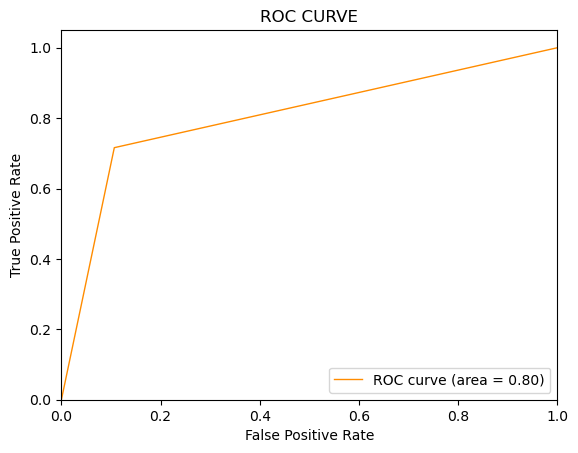

In [92]:
plt.title ("ROC Curve")
#Area under Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
# plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [93]:
SVC_roc_value = roc_auc_score(y_test, y_test_pred)
print("SVC roc_value: {0}" .format(SVC_roc_value))

SVC roc_value: 0.8046913580246913


In [94]:
# evaluation: Confusion Matrix and Test Accuracy
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# measure accuracy
test_accuracy = round(metrics.accuracy_score(y_test, y_test_pred),2)*100

print("Test Accuracy is : ",test_accuracy, "\n")
print(confusion)

Test Accuracy is :  83.0 

[[134  16]
 [ 23  58]]
